### Fashion MNIST experiment 

In [1]:
import numpy as np
import models as ml
import matplotlib.pyplot as plt

from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
from keras.layers import BatchNormalization, Dropout
from utils import mnist_reader

%matplotlib inline

Using TensorFlow backend.


#### 1), load data 

In [2]:
X_train, y_train = mnist_reader.load_mnist('./data/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data/data/fashion', kind='t10k')

In [3]:
X_train = (X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0).astype(np.float32)
X_test = (X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0).astype(np.float32)

In [4]:
def id_to_onehot(y, size):
    onehot = np.zeros(shape=(y.shape[0], size))
    for i in range(0, y.shape[0]):
        onehot[i][y[i]] = 1
    return onehot

def show_img(img, zoom=4, dpi=80):
    w = img.shape[0]
    h = img.shape[1]
    plt.figure(figsize=(w*zoom/dpi, h*zoom/dpi), dpi=dpi)
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    return

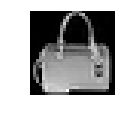

In [5]:
show_img(X_train[234].reshape(28, 28))

In [6]:
y_train = id_to_onehot(y_train, 10)
y_test = id_to_onehot(y_test, 10)

#### 2), build model 

In [ ]:
m = Sequential()

m.add(Flatten(input_shape=(28, 28, 1)))
m.add(Dense(800))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(Dense(10))
m.add(BatchNormalization())
m.add(Activation('softmax'))

m.summary()

In [ ]:
m.compile(optimizer='Adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

m.fit(X_train,
      y_train,
      validation_data=(X_test, y_test),
      batch_size=32,
      epochs=10)

In [ ]:
evaluation_test = m.evaluate(X_train, y_train, verbose=0)

In [ ]:
print('loss: {0}, accuracy: {1}'.format(evaluation_test[0], evaluation_test[1]))

#### 3), have fun with our softmax model implemented with numpy

In [13]:
feature_count = 28 * 28
sample_count = X_train.shape[0]

train_X = X_train.reshape((sample_count, feature_count))
test_X = X_test.reshape((X_test.shape[0], feature_count))

In [ ]:
epochs = 100
batch_size=20
step = 10

W, b = ml.create_parameters(feature_count, 10)

In [15]:
for epoch in range(0, epochs):

    batch_start = 0    
    while(batch_start + batch_size < sample_count):
        batch_X = train_X[batch_start:batch_start+batch_size,:]
        batch_y = y_train[batch_start:batch_start+batch_size,:] 
        h = ml.softmax_regression_model(batch_X, W, b)
        dW, db = ml.crossentropy_cost_dev(batch_X, batch_y, h)
        W, b = ml.gd_update(W, b, dW, db, lr=0.01)
        batch_start += batch_size

    if (epoch + 1) % step == 0:
        h = ml.softmax_regression_model(train_X, W, b)
        cost = ml.crossentropy_cost(h, y_train)
        acc = ml.categorical_accuracy(h, y_train)
        print("epoch {0}, cost {1}, acc {2}".format(epoch + 1, cost, acc))

print("training finished.")        
        
h = ml.softmax_regression_model(train_X, W, b)
cost = ml.crossentropy_cost(h, y_train)
acc = ml.categorical_accuracy(h, y_train)
print("final cost {0}, acc {1}".format(cost, acc))

h = ml.softmax_regression_model(test_X, W, b)
cost = ml.crossentropy_cost(h, y_test)
acc = ml.categorical_accuracy(h, y_test)
print("test cost {0}, acc {1}".format(cost, acc))

epoch 10, cost 0.04556170586125792, acc 0.8483166666666667
epoch 20, cost 0.04470057177344409, acc 0.85065
epoch 30, cost 0.04395029435491077, acc 0.85255
epoch 40, cost 0.043291170964379504, acc 0.8542833333333333
epoch 50, cost 0.04270783175925683, acc 0.8557
epoch 60, cost 0.042188147494298334, acc 0.8573
epoch 70, cost 0.04172243826525211, acc 0.8583833333333334
epoch 80, cost 0.04130288877340626, acc 0.85955
epoch 90, cost 0.04092311584943524, acc 0.8601666666666666
epoch 100, cost 0.04057784971178409, acc 0.8610833333333333
training finished.
final cost 0.04057784971178409, acc 0.8610833333333333
test cost 0.04800825354473299, acc 0.8443
